# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement: 
### Areas of medical research awarded NHMRC and MRFF grants for Monash University over the last 10 years.

In Australia, two of the major sources of research grants come from the Medical Research Future Fund (MRFF) and the National Health and Medical Research Council (NHMRC).

These grants are awarded annually and the funding is key to the survival of academics at institutions like universities. This type of funding allows the Academia segment of the Life Sciences market to survive. 

I will interrogate this data to understand the areas of research that have received grant support. 
To do this I will gather data relating to MRFF and NHMRC grants received by Monash University over the last 10 years.
Monash University is a major university located in Melbourne, Australia.

### **1.2.** Gather at least two datasets using two different data gathering methods

### Dataset 1: MRFF Grant recipients

**Type:** Excel File (.xlsx file)

**Method:** The data was progammatically downloaded as a `.get` request from the [MRFF website](https://www.health.gov.au/sites/default/files/2024-04/medical-research-future-fund-mrff-grant-recipients.xlsx).

**Dataset variables:** The complete list of variables are programmatically listed in the cell below.

The variables that will be extracted for further analysis are:
- Organisation
- Project Name
- Chief Investigator
- Contract Start Date
- Contract End Date
- Field(s) of Research
- Total Grant Value

**Rationale:** As mentioned above, MRFF grants are a major source of funding in the Academia segment. The data is publicly available and is a rich source of information on which institutions, scientists, grant duration, grant amount and areas of research. The data comes directly from the MRFF website and is a government site.

In [1]:
#Import libraries
import pandas as pd
import requests
import os

#Make directory if one does not already exist
folder_name = 'Data_wrangling_project'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#URL for the vaccination data by LGA for Australia
MRFF_data_url = 'https://www.health.gov.au/sites/default/files/2024-04/medical-research-future-fund-mrff-grant-recipients.xlsx'

#Create an HTTP GET request for the file
response = requests.get(MRFF_data_url)

#Raise an exception if request results in an error
response.raise_for_status()

#Defining filepath
file_path = os.path.join(folder_name, MRFF_data_url.split('/')[-1])

#Store raw MRFF data in local store
with open(file_path, mode='wb') as file:
    file.write(response.content)

#Convert .xlsx file into Dataframe
MRFF_data = pd.read_excel(file_path)

#View first 5 rows of the dataframe
MRFF_data.head(2)

,MRFF Initiative,Grant Opportunity,Organisation,Organisation Type,State \nor Territory,Project Name,Project Summary,Chief Investigator \nA/Project Lead,Chief Investigator Team,Type of Grant,Contract Start Date,Contract End Date,Field of Research Category,Field(s) of Research,Broad Research Area,Total Grant Value
0,Australian Brain Cancer Mission,2018 Enhanced Capacity of the Australian and N...,Monash University,University,VIC,Australian and New Zealand Children's Haematol...,Development and implementation of an Australia...,Not applicable,Not available,One-off/ad hoc,2018-09-25 00:00:00,2024-09-28 00:00:00,Not available,Not available,Not available,3010000.0
1,Australian Brain Cancer Mission,2018 Enhanced Capacity of the Cooperative Tria...,University of Sydney,University,NSW,Cooperative Trials Group for Neuro-Oncology,Development and implementation of an Australia...,Not applicable,Not available,One-off/ad hoc,2018-09-28 00:00:00,2024-06-30 00:00:00,Not available,Not available,Not available,2500000.0


In [2]:
#List the column names for MRFF dataset
MRFF_column_names = '\n'.join(MRFF_data.columns)
print(f'The variables in the MRFF dataset are as follows:\n{MRFF_column_names}')

The variables in the MRFF dataset are as follows:
MRFF Initiative
Grant Opportunity
Organisation
Organisation Type
State 
or Territory 
Project Name
Project Summary
Chief Investigator 
A/Project Lead
Chief Investigator Team
Type of Grant
Contract Start Date
Contract End Date
Field of Research Category
Field(s) of Research
Broad Research Area
Total Grant Value


#### MRFF variables of interest:
The variables that will be extracted from the MRFF dataset for further analysis are:
- Organisation
- Project Name
- Chief Investigator
- Contract Start Date
- Contract End Date
- Field(s) of Research
- Total Grant Value

#### MRFF removal of unnescessary variables
The unnecessary variables will be removed in the following cell.


In [3]:
#Removal of the unwanted variables from the MRFF dataset.
#Columns to remove
columns_to_remove = [0,1,3,4,6,8,9,12,14]

#Drop the specified columns and rename the df
MRFF_data_subset = MRFF_data.drop(MRFF_data.columns[columns_to_remove], axis=1)

#Inspect the df to check that the correct columns have been dropped
MRFF_data_subset.head(2)

#Remove rows that are not 'Monash University'
filtered_MRFF_subset = MRFF_data_subset[MRFF_data_subset['Organisation'] == 'Monash University']

#Confirming that only the 'Monash University' data remains
filtered_MRFF_subset.head()
filtered_MRFF_subset['Organisation'].value_counts()

Organisation
Monash University    170
Name: count, dtype: int64

### Dataset 2: NHMRC Grant recipients

**Type:** JSON File

**Method:** The data was progammatically downloaded via the NHMRC API host ARDC [(Australian Research Data Commons)](https://documentation.ardc.edu.au/?l=en). 

Accessing this data required registering for a unique user code *(c0fca77853cc)* and can be seen in the URL query below.

Other related information such as schema and service parameters are listed below:
- [Query schema](https://researchdata.edu.au/registry/services/query_schema)
- [Service parameters](https://documentation.ardc.edu.au/rda/research-activities-api#ResearchActivitiesAPI-ServiceParameters)

**Dataset variables:** Programmatically listed in the cell below.

The variables that were extracted for this analysis are:
- title
- institutions
- fundingAmount
- principalInvestigator
- startDate
- endDate
- funder
- subjects

**Rationale:** As mentioned above, NHMRC grants are a major source of funding in the Academia segment of the Life Sciences industry. The data is publicly available and is a rich source of information. The data is also available as downloadable `.xlsx` file, however for the purpose of this project I wanted to get experience working with a `.json` file and Application Programming Interface (API). It is also a requirement of this project to use two different data gathering methods. ARDC are the authorised host of this data and I deem this a reliable source.

In [4]:
#FILL IN 2nd data gathering and loading method
#Importing the JSON library to interact with the JSON data using Python.
import json

#Access API and download NHMRC grants for Monash University
NHMRC_url = 'https://researchdata.edu.au/api/v2.0/registry/activities?api_key=cOfca77853cc&institution="Monash%20University"&type+grant&funder="National Health And Medical Research Council"&limit=1000'
NHMRC_data = requests.get(NHMRC_url)

#Make the JSON file readable in Python
json_data = NHMRC_data.json()

#View the JSON data
json_data

{'status': 'OK',
 'code': '200',
 'message': {'message_version': 'v1.0',
  'api_version': 'v2.0',
  'format': 'application/json'},
 'data': {'numFound': 3420,
  'offset': 0,
  'limit': 1000,
  'records': [{'id': '100720',
    'key': 'http://purl.org/au-research/grants/nhmrc/436780',
    'type': 'grant',
    'title': 'Analysis of calcitonin receptor binding and function',
    'description': "Receptors form a basic intermediary as the acceptor site for signals that are transmitted between the cells that make up our body. Modulation of receptors, therefore, forms a key target in our ability to treat disease. The largest class of receptors is the superfamily of G protein-coupled receptors (GPCRs), which transmit signals within a cell via proteins called G proteins. GPCRs form between 1 and 5% of the entire repertoire of human genes. One group of GPCRs provide the target for small protein molecules that cirulate through the body. One such circulating molecule is calcitonin, a peptide that p

In [5]:
#Extract the names of the variables in the JSON file
NHMRC_keys = json_data['data']['records'][0].keys()
NHMRC_keys_list = '\n'.join(list(NHMRC_keys))

#Print the list of variables
print(f'The variables that can be found within the NHMRC .json file are as follows:\n{NHMRC_keys_list}')

The variables that can be found within the NHMRC .json file are as follows:
id
key
type
title
description
institutions
researchers
status
fundingAmount
fundingScheme
startDate
endDate
dateTimeModified
dateTimeCreated
funder
managingInstitution
principalInvestigator
purl
identifiers
subjects
links


### NHMRC removal of unnescessary variables
The unnecessary variables will be removed in the following cell.

In [6]:
#Filter JSON file for the records from 2013 onwards
filtered_records = [record for record in json_data['data']['records'] if record.get('startDate',0)> 2013]
filtered_records

#Extract the variables of interest from the filtered_records
extracted_data = []
for record in filtered_records:
    extracted_data.append({
        'title': record['title'],
        'fundingAmount':record['fundingAmount'],
        'startDate': record['startDate'],
        'endDate': record['endDate'],
        'principalInvestigator': record['principalInvestigator'],
        'subjects': record['subjects'],
        'institutions': record['institutions'],
        'funder': record['funder']
    })

#Generate df from the JSON data
NHMRC_df = pd.DataFrame(extracted_data)

#Inspect the df to ensure the correct columns remain
NHMRC_df.head(2)

,title,fundingAmount,startDate,endDate,principalInvestigator,subjects,institutions,funder
0,Improving Drug Delivery Using Nanotechnology,483402.2,2018,2021.0,[Dr Angus Johnston],"[Nanomedicine, TECHNOLOGY, NANOTECHNOLOGY, nan...",[Monash University],"[National Health and Medical Research Council,..."
1,Developing Innovative Pathways for the Prevent...,753300.0,2016,NaN,[Prof Stephen Nicholls],"[Clinical Medicine and Science, atherosclerosi...",[Monash University],"[National Health and Medical Research Council,..."


In [7]:
#Confirm that 'institutions' and 'funder' columns are only showing 'Monash University' and 'NHMRC' respectively
print(NHMRC_df['institutions'].value_counts())
print(NHMRC_df['funder'].value_counts())

#Remove square brackets from the values and shortening NHMRC for readability by reassigning the values in these columns
NHMRC_df['institutions'] = 'Monash University'
NHMRC_df['funder'] = 'NHMRC'

#Confirm changes were successful
NHMRC_df.head(2)

#Inspection dataset using .info() prior to concatenation for reference
NHMRC_df.info()

institutions
[Monash University]    423
Name: count, dtype: int64
funder
[National Health and Medical Research Council, National Health and Medical Research Council (Australia), National Health and Medical Research Council (NHMRC)]    423
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  423 non-null    object 
 1   fundingAmount          423 non-null    float64
 2   startDate              423 non-null    int64  
 3   endDate                207 non-null    float64
 4   principalInvestigator  365 non-null    object 
 5   subjects               423 non-null    object 
 6   institutions           423 non-null    object 
 7   funder                 423 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.6+ KB


In the above cell I have identified an inconsistency with the 'start' and 'end' date data after applying the `.info()` function. 
These are `int64` and `float64` respectively.
For efficiency and consistency, the dtype conversion of these columns will be performed after the concatenation.

### Combining the two datasets
Before concatenating the two datasets, the column names will be changed to ensure the variables are combined correctly.

In [8]:
#Rename the columns in the MRFF dataset
new_column_names = {'Project Name':'title', 'Chief Investigator \nA/Project Lead': 'principalInvestigator', 'Field(s) of Research': 'subjects', 'Contract Start Date': 'startDate', 'Contract End Date': 'endDate', 'Total Grant Value': 'fundingAmount', 'Organisation': 'institutions'}
filtered_MRFF_subset = filtered_MRFF_subset.rename(columns=new_column_names)

#Include a column in this dataset to identify it as 'MRFF' in the concatenated df
filtered_MRFF_subset['funder'] = 'MRFF'

#Confirm the changes
filtered_MRFF_subset.head(2)

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder
0,Monash University,Australian and New Zealand Children's Haematol...,Not applicable,2018-09-25 00:00:00,2024-09-28 00:00:00,Not available,3010000.0,MRFF
20,Monash University,Using Polygenic Risk Scores to Target Statin T...,Professor Stephen Nicholls,2020-06-01 00:00:00,2024-11-30 00:00:00,Cardiology (Incl. Cardiovascular Diseases),1416095.0,MRFF


In [9]:
#Concatenate the two dataframes
concatenated_df = pd.concat([filtered_MRFF_subset,NHMRC_df], axis=0)

#Check a random sample of the concatenated dataset to ensure data from both sets is present
concatenated_df.sample(20)

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder
39,Monash University,Optimizing the differentiation and expansion o...,[Prof Colin Pouton],2015,2018.0,[MEDICAL AND HEALTH SCIENCES],915719.25,NHMRC
237,Monash University,The role of Clostridium difficile spore intera...,[Prof Dena Lyras],2016,2018.0,"[Medical Bacteriology, MEDICAL AND HEALTH SCIE...",525993.00,NHMRC
274,Monash University,Engendering biased signalling at the human cal...,[Dr Katie Leach],2015,2018.0,"[Basic Pharmacology, MEDICAL AND HEALTH SCIENC...",633860.00,NHMRC
191,Monash University,Improving child health and development in reso...,[Dr Thach Tran],2016,NaN,"[Public Health, child health | malnutrition | ...",314644.00,NHMRC
257,Monash University,Cannabidiol may protect the brain against the ...,[Prof Murat Yucel],2018,NaN,"[Clinical Medicine and Science, cannabis | hip...",974586.00,NHMRC
353,Monash University,TreatOA4life (Treat OsteoArthritis4life) – a s...,[A/Pr Anita Wluka],2018,2019.0,"[Rheumatology and Arthritis, MEDICAL AND HEALT...",181065.66,NHMRC
787,Monash University,The Artificial Heart Frontiers Program,Professor David Kaye,2021-06-15 00:00:00,2022-09-14 00:00:00,Not available,999570.00,MRFF
131,Monash University,Intraductal carcinoma of the prostate: indicat...,[Prof Gail Risbridger],2015,NaN,"[Clinical Medicine and Science, prostate cance...",851915.00,NHMRC
89,Monash University,The investigation of markers of relapse and po...,[Dr Shalini Arunogiri],2015,2017.0,"[Biological Psychology (Neuropsychology, Psych...",103088.56,NHMRC
124,Monash University,Dissecting TAF5L and TAF6L functions in embryo...,None,2019,NaN,"[Basic Science, epigenetics | embryonic stem c...",691653.00,NHMRC


### Optional data storing step:
The concatenated dataframe is stored locally using the following code:

In [10]:
#Store the concatenated df in local data store
concatenated_df.to_csv('Data_wrangling_project\concat_df.csv', index=False)

## 2. Assess data

### Assessment summary:

#### Quality issue 1:
- Inconsistent representation of **dates** in the `'startDate'` columns.

#### Quality issue 2:
- In `'principalInvestigator'` column some values have square brackets and 'none' also appears. It is not vital to this analysis.

#### Tidiness issue 1:
- A local unique ID to be included. As the `'subjects'` values will be separated and transferred to a different table, it will be helpful in order to link back to this parental dataset.
  
#### Tidiness issue 2:
- The `'subjects'` values will need to be re-structured for the purpose of this analysis. They often contain multiple values and will be transferred to a separate dataframe.

### Quality issue 1:

In [11]:
#FILL IN - Inspecting the dataframe visually
concatenated_df.sample(50)

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder
399,Monash University,Predicting treatment response to onabotulinumt...,[A/Pr Anneke van der Walt],2015,NaN,"[Clinical Medicine and Science, multiple scler...",524894.00,NHMRC
177,Monash University,Integrated system wide characterization of mic...,None,2015,2019.0,"[Innate Immunity, MEDICAL AND HEALTH SCIENCES,...",359999.70,NHMRC
166,Monash University,Molecular basis for conjugative transfer of an...,[Prof Julian Rood],2016,NaN,"[Basic Science, antibiotic resistance | plasmi...",872660.00,NHMRC
674,Monash University,Measuring adherence to best practice guideline...,Professor John Zalcberg,2020-06-01 00:00:00,2025-05-31 00:00:00,Public Health And Health Services Not Elsewher...,3520935.00,MRFF
288,Monash University,Bone marrow Endothelial Stem Cells have the ca...,[Prof Susan Nilsson],2015,2019.0,"[Haematology, MEDICAL AND HEALTH SCIENCES, CAR...",1452856.20,NHMRC
153,Monash University,"NLRC5, a new regulator of Helicobacter-induced...",[Prof Richard Ferrero],2016,NaN,"[Basic Science, helicobacter pylori | pathogen...",640136.00,NHMRC
296,Monash University,Targeting epigenetic pathways that lead to dia...,[Prof Mark Cooper],2018,NaN,"[Clinical Medicine and Science, diabetic compl...",989948.00,NHMRC
218,Monash University,Generation of human intestinal stem cells by d...,[Dr Christian Nefzger],2018,NaN,"[Basic Science, intestinal | stem cells | plur...",621688.00,NHMRC
324,Monash University,Precision medicine for epilepsy and beyond: fr...,[Prof Patrick Kwan],2018,2022.0,"[Central Nervous System, MEDICAL AND HEALTH SC...",487891.70,NHMRC
464,Monash University,Convalescent Plasma for COVID-19,Associate Professor Zoe McQuilten,2020-06-01 00:00:00,2021-02-28 00:00:00,Infectious Diseases,371606.00,MRFF


In [12]:
#FILL IN - Inspecting the dataframe programmatically
print(concatenated_df.info())
date_dtype = concatenated_df['startDate'].dtype
print(f'The dtype for the "startDate" is {date_dtype}')

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 422
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   institutions           593 non-null    object 
 1   title                  593 non-null    object 
 2   principalInvestigator  535 non-null    object 
 3   startDate              593 non-null    object 
 4   endDate                377 non-null    object 
 5   subjects               593 non-null    object 
 6   fundingAmount          593 non-null    float64
 7   funder                 593 non-null    object 
dtypes: float64(1), object(7)
memory usage: 41.7+ KB
None
The dtype for the "startDate" is object


#### Issue and justification: 
`.sample(50)` is a non-directed method that allowed me to visually scan a random sample of 50 rows. 

This has revealed inconsistencies including extended 'DateTime'-like format and `float`-like type data with decimal.Progammatic confirmation by `.info()` and `.dtype`.

Having the 'date' as an `obj` dtype will cause problems with the visualisation and graphical analyses.

### Quality Issue 2:
In `'principalInvestigator'` column some values have square brackets and 'none' also appears. I will inspect these rows programmatically and convert these to a standardised **'NaN'** for consistency and accuracy

In [13]:
#FILL IN - Inspecting the dataframe visually
concatenated_df['principalInvestigator'].sample(50)

344                                  None
392             [Prof Christina Mitchell]
1079             Professor Danielle Mazza
85                                   None
5                     [Dr Tsharni Zazryn]
329                     [Dr Wendy Imlach]
244                        [Prof Jian Li]
125         [A/Pr David Nikolic-Paterson]
294                  [Prof Scott O'Neill]
193                      [A/Pr Ian Smyth]
222                 [Dr Thomas Andrillon]
109                  [Prof Moira O'Bryan]
989        Professor Colin William Pouton
399               Professor Anne Holland 
307                      [A/Pr Jinhua Li]
1010             Professor Jonathan Baell
73       Professor David Nikolic-Paterson
34                       [Dr Anja Knaupp]
201                    [Prof Anton Peleg]
1265                 Professor Erica Wood
58                       [Dr Trisha Peel]
1214                       Not applicable
343                  [Prof Robyn O'Hehir]
1261    Associate Professor Nadine

In [14]:
#FILL IN - Inspecting the dataframe programmatically
print(concatenated_df['principalInvestigator'].apply(type).value_counts())

principalInvestigator
<class 'list'>        365
<class 'str'>         170
<class 'NoneType'>     58
Name: count, dtype: int64


#### Issue and justification:
Non-directed visual inspection of the data using `.sample(10)` shows that some names are surrounded by square brackets.

Programmatic inspection reveals that there are `'list'` dtype values in this column.

### Tidiness Issue 1:

In [15]:
#FILL IN - Inspecting the dataframe visually
concatenated_df.head(10)

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder
0,Monash University,Australian and New Zealand Children's Haematol...,Not applicable,2018-09-25 00:00:00,2024-09-28 00:00:00,Not available,3010000.00,MRFF
20,Monash University,Using Polygenic Risk Scores to Target Statin T...,Professor Stephen Nicholls,2020-06-01 00:00:00,2024-11-30 00:00:00,Cardiology (Incl. Cardiovascular Diseases),1416095.00,MRFF
26,Monash University,Statins and Progression of Coronary Atheroscle...,Professor Stephen Nicholls,2021-06-01 00:00:00,2025-05-31 00:00:00,Cardiology (Incl. Cardiovascular Diseases),1669300.28,MRFF
33,Monash University,ECMO-Rehab: A Randomised Controlled Trial of E...,Professor Carol Hodgson,2021-06-01 00:00:00,2024-05-31 00:00:00,Intensive Care,662648.57,MRFF
41,Monash University,New models of rehabilitation to improve work a...,Professor Natasha Lannin,2021-06-01 00:00:00,2023-12-31 00:00:00,Rehabilitation And Therapy (Excl. Physiotherapy),999056.20,MRFF
45,Monash University,Atheroma Progression in Clonal Haematopoiesis ...,Professor Stephen Nicholls,2022-06-01 00:00:00,2025-05-31 00:00:00,"Cardiorespiratory Medicine And Haematology, Ca...",996384.68,MRFF
52,Monash University,Addressing the poor medication adherence in pr...,Doctor Stella Talic,2022-06-01 00:00:00,2026-05-31 00:00:00,"Public Health And Health Services, Primary Hea...",706241.60,MRFF
54,Monash University,Love Your Brain: A stroke prevention digital p...,Associate Professor Monique Kilkenny,2022-06-01 00:00:00,2025-12-31 00:00:00,"Public Health And Health Services, Health Prom...",944787.90,MRFF
60,Monash University,Combining Novel Imaging Biomarkers with AI-Acc...,Professor Roland Bammer,2022-06-01 00:00:00,2025-12-31 00:00:00,"Clinical Sciences, Radiology And Organ Imaging",999865.70,MRFF
63,Monash University,PRecision Ecmo in CardIogenic Shock Evaluation...,Doctor Aidan Burrell,2022-06-01 00:00:00,2025-05-31 00:00:00,"Cardiorespiratory Medicine And Haematology, Ca...",999779.40,MRFF


In [16]:
#FILL IN - Inspecting the dataframe programmatically
concatenated_df.columns

Index(['institutions', 'title', 'principalInvestigator', 'startDate',
       'endDate', 'subjects', 'fundingAmount', 'funder'],
      dtype='object')

### Issue and justification:
The above cells show visually and programmatically that there is no column for unique ID.

### Tidiness Issue 2: Area(s) of research columns

In [17]:
#FILL IN - Inspecting the dataframe visually
concatenated_df.sample(50)

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder
1214,Monash University,Monash Partners Advanced Health Translation Ce...,Not applicable,2019-07-01 00:00:00,2024-06-30 00:00:00,Not available,4131439.00,MRFF
69,Monash University,Protein-RNA interactions in antiviral cellular...,[Prof Matthew Wilce],2015,NaN,"[Basic Science, rna | messenger rna (mrna) | i...",675810.00,NHMRC
32,Monash University,Understanding the genetics of blood cells and ...,[Prof Benjamin Kile],2014,NaN,"[Basic Science, haematopoiesis | myeloid | pla...",727610.00,NHMRC
78,Monash University,Centre of Research Excellence in Prehospital E...,[Prof Peter Cameron],2016,NaN,"[Health Services Research, emergency medical s...",2499626.00,NHMRC
335,Monash University,"Activin and its binding protein, follistatin r...",[A/Pr Mark Hedger],2014,2016.0,"[Reproduction, MEDICAL AND HEALTH SCIENCES, PA...",612736.44,NHMRC
299,Monash University,Bronchopulmonary Dysplasia – A Regenerative Me...,[Dr Rebecca Lim],2015,2017.0,"[Paediatrics, MEDICAL AND HEALTH SCIENCES, PAE...",480406.44,NHMRC
273,Monash University,"Adenosine A1 receptor modulation: Structure, d...",[Prof Arthur Christopoulos],2018,2022.0,"[Basic Pharmacology, MEDICAL AND HEALTH SCIENC...",1814005.50,NHMRC
205,Monash University,The role of immune cells and the transcription...,[Dr Jan Kaslin],2014,2016.0,[Developmental Genetics (incl. Sex Determinati...,375561.53,NHMRC
56,Monash University,NOVEL SOLUTIONS FOR ANTIMICROBIAL RESISTANT PA...,[Prof Anton Peleg],2017,NaN,"[Basic Science, antibiotic resistance | bacter...",474513.00,NHMRC
370,Monash University,Central Nervous System Dendritic Cells – Guilt...,[Prof Paul Mcmenamin],2014,2017.0,"[Central Nervous System, MEDICAL AND HEALTH SC...",481594.75,NHMRC


In [18]:
#FILL IN - Inspecting the dataframe programmatically
concatenated_df['subjects'].value_counts()

subjects
Not available                                                                                                                                                                                                                                 31
Intensive Care                                                                                                                                                                                                                                 7
Haematology                                                                                                                                                                                                                                    5
Infectious Diseases                                                                                                                                                                                                                            5
Public Health And Health Se

### Issue and justification:
In the above cells I have used `.sample(5)` to view 5 random rows. I can see that 'subjects' column contains multiple subjects or areas of research.

Programmatically I have used `.value_counts()` to show that there 517 unique values contained within this column.
These values will need to cleaned and re-structured in order to generate a histogram that displays the frequency of each constituent area of research that are receiving grant money.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [19]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
concat_clean = concatenated_df.copy()

### **Quality Issue 1: FILL IN**

In [20]:
# FILL IN - Apply the cleaning strategy
#Convert values in this column to str
concat_clean['startDate'] = concat_clean['startDate'].astype(str)

#Function that extracts the first 4 characters of a string
def extract_first_4_chars(string):
    return string[:4]

#Apply the extract function to the vlaues in the 'startDate' colum
concat_clean['startDate_clean'] = concat_clean['startDate'].apply(extract_first_4_chars)

In [21]:
# FILL IN - Validate the cleaning was successful

#Check conversion of all 'startDate' to str
print(concat_clean['startDate'].apply(type).value_counts())

#Confirm that all values in the column are a 4-digit year and type 'int'
concat_clean['startDate_clean'].value_counts()

startDate
<class 'str'>    593
Name: count, dtype: int64


startDate_clean
2018    103
2015     85
2017     79
2016     77
2014     57
2019     54
2022     35
2020     34
2023     32
2021     26
2024     11
Name: count, dtype: int64

Justification: for can see differences in how the dates are represented in the 'startDate' and 'endDate' columns. The dates will be converted to a DateTime or for simplicity an int dtype representing year could be used.

### **Quality Issue 2: FILL IN**

In [22]:
#FILL IN - Apply the cleaning strategy

#Identify the datatypes of the values within the column
print(concat_clean['principalInvestigator'].apply(type).value_counts())

#Function that will convert any 'list' type values to 'str' and remove the square brackets with regex
def convert_to_string(lst):
    if isinstance(lst,list):
        return str(lst[0]).strip('[]\'')
    else:
        return lst

#Apply the function to the values in the column   
concat_clean['principalInvestigator'] = concat_clean['principalInvestigator'].apply(convert_to_string)

principalInvestigator
<class 'list'>        365
<class 'str'>         170
<class 'NoneType'>     58
Name: count, dtype: int64


In [23]:
#FILL IN - Validate the cleaning was successful

#Function that only assesses 'str' values and returns True if the 'str' is surrounded by square brackets
def is_surrounded_by_square_brackets(s):
    if isinstance(s,str):
        return s.startswith('[') and s.endswith(']')
    else:
        return False

#Apply the function to the values in the column
concat_clean['surrounded_by_square_brackets'] = concat_clean['principalInvestigator'].apply(is_surrounded_by_square_brackets)

#Confirm that all of the values are False for bing surrounded by square brackets
concat_clean['surrounded_by_square_brackets'].value_counts()

surrounded_by_square_brackets
False    593
Name: count, dtype: int64

### Justification:
- The values in this coumn were a mix of `str`, `list` and `NoneType`, as revealed by `.apply(type).value_counts()`.
The values in the column that were surrounded by square brackets were 'lists' consisting of a single name. Therefore they did not need to remain as 'lists'.
- The `convert_to_string` function was applied to only these `list` values, the square brackets were removed and the value returned as a `str`.
- The success of the cleaning was then assessed by generating a new column that applied the `is_surrounded_by_square_brackets` function and returned **True** or **False**. Finally a `.value_counts()` on the 'surrounded_by_square_brackets' column showed that these were all **False**.

### **Tidiness Issue 1: FILL IN**

In [24]:
#FILL IN - Apply the cleaning strategy
concat_clean['Unique_ID'] = range(1, len(concat_clean) + 1)

concat_clean.set_index('Unique_ID', inplace=True)

In [25]:
#FILL IN - Validate the cleaning was successful
print(concat_clean.head())
concat_clean.tail()

                institutions  \
Unique_ID                      
1          Monash University   
2          Monash University   
3          Monash University   
4          Monash University   
5          Monash University   

                                                       title  \
Unique_ID                                                      
1          Australian and New Zealand Children's Haematol...   
2          Using Polygenic Risk Scores to Target Statin T...   
3          Statins and Progression of Coronary Atheroscle...   
4          ECMO-Rehab: A Randomised Controlled Trial of E...   
5          New models of rehabilitation to improve work a...   

                principalInvestigator            startDate  \
Unique_ID                                                    
1                      Not applicable  2018-09-25 00:00:00   
2          Professor Stephen Nicholls  2020-06-01 00:00:00   
3          Professor Stephen Nicholls  2021-06-01 00:00:00   
4             Pr

,institutions,title,principalInvestigator,startDate,endDate,subjects,fundingAmount,funder,startDate_clean,surrounded_by_square_brackets
Unique_ID,,,,,,,,,,
589,Monash University,ASPREE- NEURO; aspirin and cerebral microhaemo...,Prof John Mcneil,2015,2018.0,"[Neurosciences not elsewhere classified, MEDIC...",989195.44,NHMRC,2015,False
590,Monash University,Redefining proprioceptive circuitry at a molec...,A/Pr Edwina Mcglinn,2014,2017.0,[Developmental Genetics (incl. Sex Determinati...,564482.70,NHMRC,2014,False
591,Monash University,Increasing the capacity of community pharmacy ...,A/Pr Suzanne Nielsen,2017,NaN,"[Health Services Research, addiction preventio...",177197.00,NHMRC,2017,False
592,Monash University,RESTORING COGNITIVE FUNCTION USING BRAIN STIMU...,A/Pr Kate Hoy,2015,2018.0,"[Neurocognitive Patterns and Neural Networks, ...",426556.56,NHMRC,2015,False
593,Monash University,Characterisation of mobile antimicrobial resis...,None,2019,NaN,"[Basic Science, antimicrobial resistance | bio...",878108.00,NHMRC,2019,False


#### Justification:
- A new column 'Unique_ID' was generated and it's values assigned using `.range()` function.
- The `.range()` function generated a new sequential integer for each row.
- The 'Unique_ID' column was then set as the index using `.set_index()` function.
- The validation was  was assessed by `.head()` and `.tail()` functions.


### **Tidiness Issue 2: FILL IN**

In [26]:
#FILL IN - Apply the cleaning strategy
#Make a new df based on the values in the column 'subjects'
new_df = concat_clean['subjects'].copy()
keyword_df = pd.DataFrame(new_df)

#Confirm the new df has the relevant data 
keyword_df.head()

,subjects
Unique_ID,
1,Not available
2,Cardiology (Incl. Cardiovascular Diseases)
3,Cardiology (Incl. Cardiovascular Diseases)
4,Intensive Care
5,Rehabilitation And Therapy (Excl. Physiotherapy)


In [27]:
#The values in this df contain some lists that are surrounded by square brackets
#These values will be be converted to 'str' and the square backets removed
#These actions will be performed using the 'convert_list_to_string' function

def convert_list_to_string(lst):
    if isinstance(lst,list):
        return str(lst).strip('[]\'')
    else:
        return lst
#'convert_list_to_string' function is applied to the column
keyword_df['subjects_str'] = keyword_df['subjects'].apply(convert_list_to_string)

#Confirm the changes visually with random sample
keyword_df.sample(10)

,subjects,subjects_str
Unique_ID,,
528,"[Clinical Medicine and Science, transfusion | ...","Clinical Medicine and Science', 'transfusion |..."
236,"[Basic Science, toll-like receptors | helicoba...","Basic Science', 'toll-like receptors | helicob..."
334,"[Public Health, aboriginal | stroke | cerebrov...","Public Health', 'aboriginal | stroke | cerebro..."
364,[Biochemistry and Cell Biology not elsewhere c...,Biochemistry and Cell Biology not elsewhere cl...
2,Cardiology (Incl. Cardiovascular Diseases),Cardiology (Incl. Cardiovascular Diseases)
227,"[Basic Science, antibiotic resistance | bacter...","Basic Science', 'antibiotic resistance | bacte..."
361,"[Basic Science, infection | innate immunity | ...","Basic Science', 'infection | innate immunity |..."
360,"[110204, ischaemia/reperfusion, novel therapeu...","110204', 'ischaemia/reperfusion', 'novel thera..."
415,"[Basic Science, antimicrobial resistance | pha...","Basic Science', 'antimicrobial resistance | ph..."


In [28]:
#The strinsg in the column will be converted to all lower-case
keyword_df['subjects_lower'] = keyword_df['subjects_str'].str.lower()

#Confirm the changes visually with random sample
keyword_df.sample(50)

,subjects,subjects_str,subjects_lower
Unique_ID,,,
431,"[Industrial and Organisational Psychology, PSY...","Industrial and Organisational Psychology', 'PS...","industrial and organisational psychology', 'ps..."
2,Cardiology (Incl. Cardiovascular Diseases),Cardiology (Incl. Cardiovascular Diseases),cardiology (incl. cardiovascular diseases)
334,"[Public Health, aboriginal | stroke | cerebrov...","Public Health', 'aboriginal | stroke | cerebro...","public health', 'aboriginal | stroke | cerebro..."
529,"[Clinical Medicine and Science, hormones | wom...","Clinical Medicine and Science', ""hormones | wo...","clinical medicine and science', ""hormones | wo..."
509,"[Clinical Medicine and Science, lung | transpl...","Clinical Medicine and Science', 'lung | transp...","clinical medicine and science', 'lung | transp..."
300,"[Health Services Research, menopause | cancer ...","Health Services Research', 'menopause | cancer...","health services research', 'menopause | cancer..."
303,"[Clinical Sciences not elsewhere classified, M...","Clinical Sciences not elsewhere classified', '...","clinical sciences not elsewhere classified', '..."
179,"[Central Nervous System, MEDICAL AND HEALTH SC...","Central Nervous System', 'MEDICAL AND HEALTH S...","central nervous system', 'medical and health s..."
546,"[Solid Tumours, MEDICAL AND HEALTH SCIENCES, O...","Solid Tumours', 'MEDICAL AND HEALTH SCIENCES',...","solid tumours', 'medical and health sciences',..."


In [29]:
#Import the re library to utilise the .sub() function
import re

#Function for removing any text enclosed with parenthesis, as this information is too detailed for this analysis
def remove_enclosed_sections(s):
    return re.sub(r'\([^)]*\)', "", s)

#Applying the 'remove_enclosed_sections' function to the column
keyword_df['subjects_drop_parenthesis'] = keyword_df['subjects_lower'].apply(remove_enclosed_sections)

#Confirm the changes visually with random sample
keyword_df.sample(50)

,subjects,subjects_str,subjects_lower,subjects_drop_parenthesis
Unique_ID,,,,
95,"Clinical Sciences, Clinical Sciences Not Elsew...","Clinical Sciences, Clinical Sciences Not Elsew...","clinical sciences, clinical sciences not elsew...","clinical sciences, clinical sciences not elsew..."
235,"[Infectious Diseases, MEDICAL AND HEALTH SCIEN...","Infectious Diseases', 'MEDICAL AND HEALTH SCIE...","infectious diseases', 'medical and health scie...","infectious diseases', 'medical and health scie..."
229,"[Infectious Diseases, MEDICAL AND HEALTH SCIEN...","Infectious Diseases', 'MEDICAL AND HEALTH SCIE...","infectious diseases', 'medical and health scie...","infectious diseases', 'medical and health scie..."
294,"[Molecular Targets, MEDICAL AND HEALTH SCIENCE...","Molecular Targets', 'MEDICAL AND HEALTH SCIENC...","molecular targets', 'medical and health scienc...","molecular targets', 'medical and health scienc..."
145,"Public Health And Health Services, Public Heal...","Public Health And Health Services, Public Heal...","public health and health services, public heal...","public health and health services, public heal..."
366,"[Basic Science, tumour immunotherapy | natural...","Basic Science', 'tumour immunotherapy | natura...","basic science', 'tumour immunotherapy | natura...","basic science', 'tumour immunotherapy | natura..."
111,"Paediatrics And Reproductive Medicine, Paediat...","Paediatrics And Reproductive Medicine, Paediat...","paediatrics and reproductive medicine, paediat...","paediatrics and reproductive medicine, paediat..."
592,"[Neurocognitive Patterns and Neural Networks, ...","Neurocognitive Patterns and Neural Networks', ...","neurocognitive patterns and neural networks', ...","neurocognitive patterns and neural networks', ..."
575,"[Haematological Tumours, MEDICAL AND HEALTH SC...","Haematological Tumours', 'MEDICAL AND HEALTH S...","haematological tumours', 'medical and health s...","haematological tumours', 'medical and health s..."


In [30]:
#Function to remove any quotation marks and the '|' (pipe) symbol.
def clean_string(s):
    s = s.replace("'", '')
    s = s.replace('|', ',')
    return s

#Apply the 'clean_strings' function to the column
keyword_df['clean_str'] = keyword_df['subjects_drop_parenthesis'].apply(clean_string)

#Confirm the changes visually with random sample
keyword_df.sample(10)

,subjects,subjects_str,subjects_lower,subjects_drop_parenthesis,clean_str
Unique_ID,,,,,
583,[Structural Biology (incl. Macromolecular Mode...,Structural Biology (incl. Macromolecular Model...,structural biology (incl. macromolecular model...,"structural biology ', 'biological sciences', '...","structural biology , biological sciences, bioc..."
52,"Biological Psychology (Neuropsychology, Psycho...","Biological Psychology (Neuropsychology, Psycho...","biological psychology (neuropsychology, psycho...",biological psychology,biological psychology
556,"[Paediatrics, MEDICAL AND HEALTH SCIENCES, PAE...","Paediatrics', 'MEDICAL AND HEALTH SCIENCES', '...","paediatrics', 'medical and health sciences', '...","paediatrics', 'medical and health sciences', '...","paediatrics, medical and health sciences, paed..."
576,"[Basic Science, seizures | cerebral palsy trea...","Basic Science', 'seizures | cerebral palsy tre...","basic science', 'seizures | cerebral palsy tre...","basic science', 'seizures | cerebral palsy tre...","basic science, seizures , cerebral palsy treat..."
368,"[Basic Science, obesity | metabolic syndrome |...","Basic Science', 'obesity | metabolic syndrome ...","basic science', 'obesity | metabolic syndrome ...","basic science', 'obesity | metabolic syndrome ...","basic science, obesity , metabolic syndrome , ..."
15,Cancer Therapy (Excl. Chemotherapy And Radiati...,Cancer Therapy (Excl. Chemotherapy And Radiati...,cancer therapy (excl. chemotherapy and radiati...,cancer therapy,cancer therapy
505,"[Public Health, overweight/obesity | preventio...","Public Health', ""overweight/obesity | preventi...","public health', ""overweight/obesity | preventi...","public health', ""overweight/obesity | preventi...","public health, ""overweight/obesity , preventio..."
468,"[Health Services Research, randomised trial | ...","Health Services Research', 'randomised trial |...","health services research', 'randomised trial |...","health services research', 'randomised trial |...","health services research, randomised trial , e..."
266,[Biochemistry and Cell Biology not elsewhere c...,Biochemistry and Cell Biology not elsewhere cl...,biochemistry and cell biology not elsewhere cl...,biochemistry and cell biology not elsewhere cl...,biochemistry and cell biology not elsewhere cl...


In [31]:
#Create dictionaty called 'keyword_counts'
keyword_counts = {}

#Iterate through rows and split all strings on the coma
#The resulting segments are then added to keyword_counts dictionary and a tally is generated
for row in keyword_df['clean_str']:
    keywords = row.split(',')
    for keyword in keywords:
        if keyword not in keyword_counts:
            keyword_counts[keyword] = 1
        else:
            keyword_counts[keyword] += 1
#Generate a new DataFrame with the 'keyword_counts' dictionary
keyword_count = pd.DataFrame(keyword_counts, index=[0])

#Confirm the changes visually with .head()
keyword_count.head()

,not available,cardiology,intensive care,rehabilitation and therapy,cardiorespiratory medicine and haematology,cardiovascular medicine and haematology not elsewhere classified,public health and health services,primary health care,health promotion,clinical sciences,...,microrna,addiction prevention,addiction treatment,pain,opioid analgesia,opioid dependence,neuromodulation,neural plasticity,bioinformatics,bacterial evolution
0,31,7,7,1,6,1,9,5,3,10,...,1,1,1,1,1,1,1,1,1,1


In [32]:
#Make a transposed version of the keyword_count df
df_transposed = keyword_count.transpose().reset_index()

#Name the transposed columns
df_transposed.columns = ['keyword', 'count']

#Sort the transposed columns based on the 'count' column in descending order
df_transposed_sorted = df_transposed.sort_values(by='count', ascending=False)

#Reset the index
df_transposed_sorted.reset_index(drop=True, inplace=True)

In [33]:
#FILL IN - Validate the cleaning was successful
#Confirm the changes visually with .head(20)
df_transposed_sorted.head(20)

,keyword,count
0,medical and health sciences,150
1,basic science,114
2,clinical medicine and science,67
3,clinical sciences,33
4,biological sciences,33
5,not available,31
6,neurosciences,28
7,public health and health services,27
8,biochemistry and cell biology,27
9,paediatrics and reproductive medicine,19


#### Justification:
The data is the 'subjects' column has been through a number of cleaning steps stated above.
It has been transformed from a column containing multiple values and inconsistent dtypes and punctuation to a form that is usable for the purpose of this analysis.

### **Remove unnecessary variables and combine datasets**

This was performed prior to the Quality and Tidiness assessment.

## 4. Update your data store

In [34]:
#FILL IN - saving data
#Save the concat_clean file
concat_clean.to_csv('Data_wrangling_project\concat_clean.csv', index=False)

#Save the keyword_count file
keyword_count.to_csv('Data_wrangling_project\keyword_count.csv', index=False)

#Save the df_transposed_sorted file
df_transposed_sorted.to_csv('Data_wrangling_project\df_transposed_sorted.csv', index=False)

## 5. Answer the research question

### **Research question:**
What areas of research have Monash University received the most NHMRC and MRFF grants since 2013?

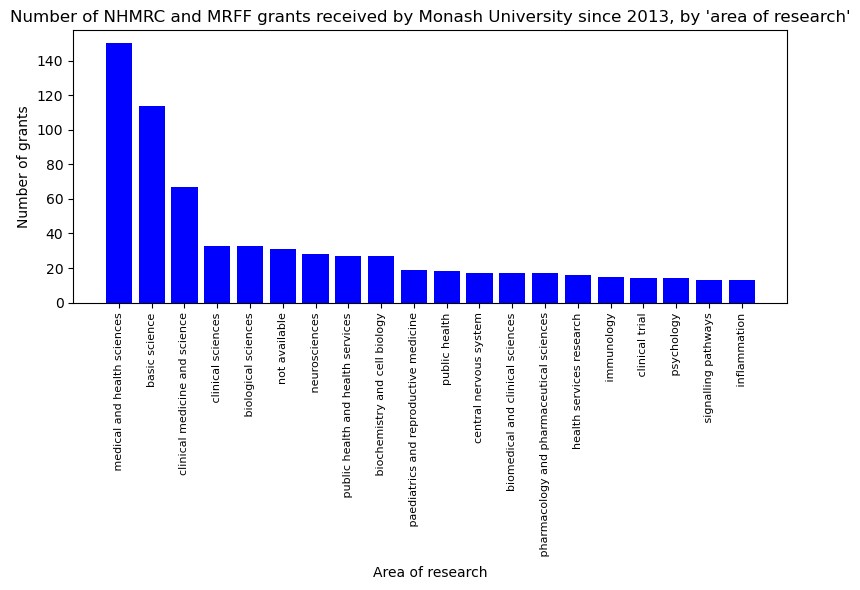

In [35]:
#Visual 1 - FILL IN
#Import matplotlib library for visualisation plots
import matplotlib.pyplot as plt

#Assign variables fot the top 20 keywords and the number of grants that include these keywords in their subject description
top_words = df_transposed_sorted['keyword'].head(20).tolist()
values= df_transposed_sorted['count'].head(20).tolist()

#Plot bar chart of the data
plt.figure(figsize=(8,6))
plt.bar(top_words, values, color='blue')
plt.title("Number of NHMRC and MRFF grants received by Monash University since 2013, by 'area of research'")
plt.xlabel('Area of research')
plt.ylabel('Number of grants')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

*Answer to research question:*

The above bar chart shows the top 20 'areas of research' and the 'number of grants' that each of these 'keyword phrases/areas of research' have received. The 'area' that has received the most funding is 'medical and health science'. It should be noted that many of these grants list more than one area of research in the source data. However, the results are still meaningful and provide both broad and more specific indicators (as one moves down the x-axis) of the research receiving the most grants. The number of grants should also be considered in the context of the dollar value of these grants. This aspect will be represented in the next visualisation.

### **Research question 2:**
What is the value of these NHMRC and MRFF grants for each 'area of research'?

In [36]:
#Generate new dataframe by merging the keyword_df with the concat_clean df, using the Unique ID as the primary key.
merged_df = pd.merge(keyword_df, concat_clean, on='Unique_ID', how='inner')

#Confirm the merge was successful
merged_df.head()

,subjects_x,subjects_str,subjects_lower,subjects_drop_parenthesis,clean_str,institutions,title,principalInvestigator,startDate,endDate,subjects_y,fundingAmount,funder,startDate_clean,surrounded_by_square_brackets
Unique_ID,,,,,,,,,,,,,,,
1,Not available,Not available,not available,not available,not available,Monash University,Australian and New Zealand Children's Haematol...,Not applicable,2018-09-25 00:00:00,2024-09-28 00:00:00,Not available,3010000.00,MRFF,2018,False
2,Cardiology (Incl. Cardiovascular Diseases),Cardiology (Incl. Cardiovascular Diseases),cardiology (incl. cardiovascular diseases),cardiology,cardiology,Monash University,Using Polygenic Risk Scores to Target Statin T...,Professor Stephen Nicholls,2020-06-01 00:00:00,2024-11-30 00:00:00,Cardiology (Incl. Cardiovascular Diseases),1416095.00,MRFF,2020,False
3,Cardiology (Incl. Cardiovascular Diseases),Cardiology (Incl. Cardiovascular Diseases),cardiology (incl. cardiovascular diseases),cardiology,cardiology,Monash University,Statins and Progression of Coronary Atheroscle...,Professor Stephen Nicholls,2021-06-01 00:00:00,2025-05-31 00:00:00,Cardiology (Incl. Cardiovascular Diseases),1669300.28,MRFF,2021,False
4,Intensive Care,Intensive Care,intensive care,intensive care,intensive care,Monash University,ECMO-Rehab: A Randomised Controlled Trial of E...,Professor Carol Hodgson,2021-06-01 00:00:00,2024-05-31 00:00:00,Intensive Care,662648.57,MRFF,2021,False
5,Rehabilitation And Therapy (Excl. Physiotherapy),Rehabilitation And Therapy (Excl. Physiotherapy),rehabilitation and therapy (excl. physiotherapy),rehabilitation and therapy,rehabilitation and therapy,Monash University,New models of rehabilitation to improve work a...,Professor Natasha Lannin,2021-06-01 00:00:00,2023-12-31 00:00:00,Rehabilitation And Therapy (Excl. Physiotherapy),999056.20,MRFF,2021,False


In [37]:
#Histogram of the top 20 keywords as they have appeared in NHMRC and MRFF grants data from 2014 to 2024

#Make list of the 'area of research' keywords
search_strings = df_transposed_sorted['keyword'].tolist()

#Remove any spaces either side of the strings
search_strings_clean = [x.strip() for x in search_strings]

#Generate blank dictionary to store results of the filtering
result_dict = {}

#Iterate through each keyword in the list
for string in search_strings_clean:
    
    #Use boolean mask to identify rows where the string is contained within the 'clean_str' column
    mask = merged_df['clean_str'].astype(str).str.contains(string, na=False, case=False)
    if mask.any():
        #Variable 'total' is the sum of the 'fundingAmounts' where the string is contain in 'clean_str'
        total = merged_df.loc[mask, 'fundingAmount'].sum()
    else:
        total = 0
    #Dictionary updates with string as key and total funding amount as the value
    result_dict[string] = total

#Confirm success of the filtering
print(result_dict)


{'medical and health sciences': 117261172.88, 'basic science': 82679457.0, 'clinical medicine and science': 48896382.0, 'clinical sciences': 94407130.7, 'biological sciences': 22364381.11, 'not available': 125395304.4, 'neurosciences': 44297034.74, 'public health and health services': 37193185.61, 'biochemistry and cell biology': 20795908.159999996, 'paediatrics and reproductive medicine': 26501133.23, 'public health': 46520114.61, 'central nervous system': 21962499.560000002, 'biomedical and clinical sciences': 39203348.849999994, 'pharmacology and pharmaceutical sciences': 14770856.92, 'health services research': 12221005.48, 'immunology': 18941669.050000004, 'clinical trial': 17132314.630000003, 'psychology': 14552510.9, 'signalling pathways': 20369526.18, 'inflammation': 14105353.61, 'oncology and carcinogenesis': 11975784.219999999, 'genetics': 48848135.82, 'obesity': 13361916.219999999, 'infectious diseases': 24869562.009999998, 'mouse models': 10975391.95, 'psychology and cognit

In [38]:
#Isolate the key and value data from the dictionary
string = list(result_dict.keys())
value = list(result_dict.values())

#Transfer the above data to a dataframe
result_df = pd.DataFrame({'string':string, 'value':value})

#Sort the data from highest rto lowest funding amount
result_df = result_df.sort_values(by='value', ascending=False)

#Divide the 'value' column by 1 million to get the amount as millions
result_df['value_million'] = result_df['value']/1000000

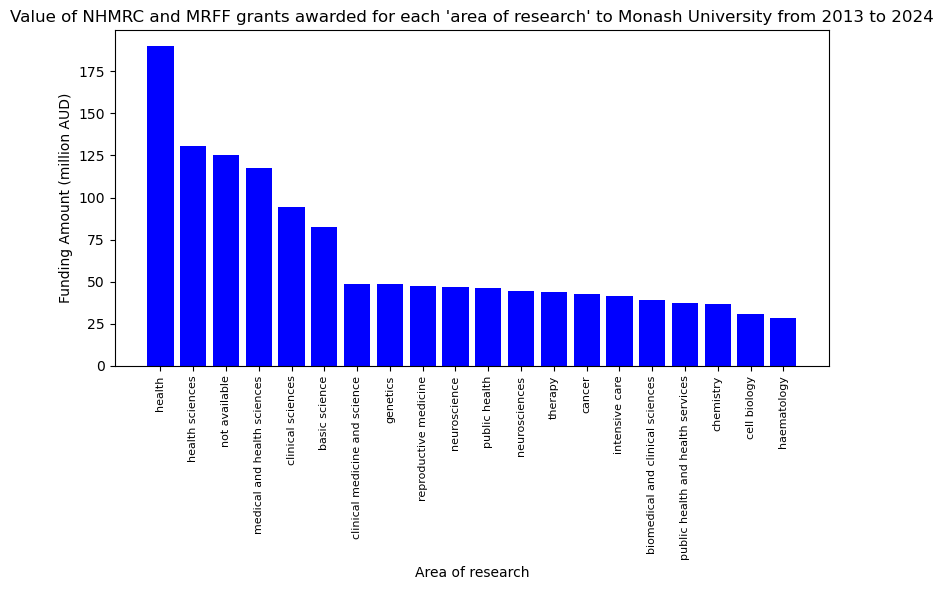

In [39]:
#Visual 2 - FILL IN
#Transfer the keyword and funding data to list format for plotting
keywords = result_df['string'].head(20).tolist()
funding= result_df['value_million'].head(20).tolist()

#Plot bar chart of the above data
plt.figure(figsize=(8,6))
plt.bar(keywords, funding, color='blue')
plt.title("Value of NHMRC and MRFF grants awarded for each 'area of research' to Monash University from 2013 to 2024")
plt.xlabel('Area of research')
plt.ylabel('Funding Amount (million AUD)')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

*Answer to research question:*

When the 'areas' are viewed in terms of 'amount of funding', "Health", "Health Sciences" and "Not Available" are the top three categories. ("Not Available" represents a large amount of funding and we could use other code and source data to understand the areas of research that these refer to. By looking at the grant title, for instance.)

These categories are very broad terms, and there are ways that this analysis could be improved. For example, one could simply to read down the list until more specific 'areas of research' are mentioned. For example, "genetics", "reproductive medicine" and "neuroscience" are less generic terms and provide good insight.

### **5.2:** Reflection

*Answer:* 
These categories are very broad terms, one could continue to go down the list until more specific 'areas of research' are mentioned. 

There are several ways that this analysis could be improved. For example, some of the more 'generic' terms could be removed from the analysis or the 'title' values could be included to identify more specific terminology for inclusion.

This data is sufficiently clean and structured to do more in-depth analyses. Such as, find which 'principalInvestigators' have received the most funding over the same time span and use that information to determine which 'areas of research' are receiving the most funding.

There is a lot that can be unpacked in this dataset, with potential benefit to a large number of stakeholders in the Life Sciences industry (such as universities, scientists and more). 

Commercials entities, such as suppliers of scientific equipment and consumables, could use the data to assist their sales people in identifying which labs and scieintists to target. Furthermore commercial suppliers might use this info to strategise on how to spend their R&D or marketing dollars, as it may indicate which products will be in higher demand in the future.